<a href="https://colab.research.google.com/github/kshashank03/data-science-projects/blob/master/Classification_Models/detecting_heavy_drinking_using_motion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Accelerometer Data to Detect Heavy Drinking

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob

In [58]:
files = glob.glob("/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/clean_tac/*.csv")
TAC_data = None

for i, f in enumerate (files):
    if i == 0:
        TAC_data = pd.read_csv(f)
        TAC_data['Participant'] = f[86:92] + "_TAC"
    else:
        tmp = pd.read_csv(f)
        tmp['Participant'] = f[86:92] + "_TAC"
        TAC_data = TAC_data.append(tmp)


TAC_data['timestamp'] = TAC_data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
TAC_data.head()

,timestamp,TAC_Reading,Participant
0,2017-05-02 10:54:50,-0.008826,SF3079_TAC
1,2017-05-02 11:27:15,-0.014854,SF3079_TAC
2,2017-05-02 11:32:30,-0.012176,SF3079_TAC
3,2017-05-02 11:37:44,0.000510,SF3079_TAC
4,2017-05-02 11:42:58,0.015509,SF3079_TAC


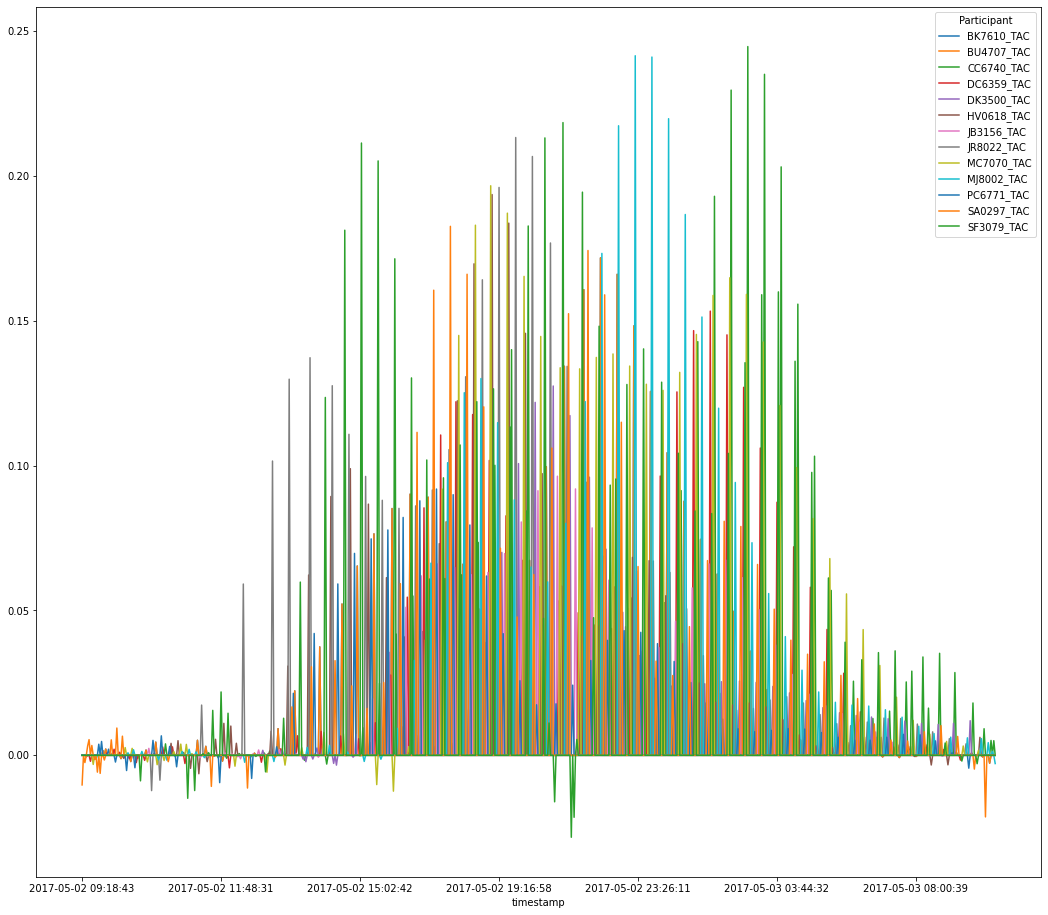

In [72]:
TAC_data_pivot = TAC_data.pivot(index='timestamp', columns='Participant', values='TAC_Reading')
TAC_data_pivot.fillna(0, inplace=True)
TAC_data_pivot.plot(figsize=(18, 16))

plt.show()

color,blue,red
x,,
0,0,0
1,1,1
2,4,2
3,9,3
4,16,4


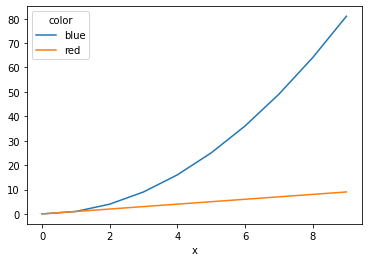

In [65]:
df = pd.DataFrame([
    ['red', 0, 0],
    ['red', 1, 1],
    ['red', 2, 2],
    ['red', 3, 3],
    ['red', 4, 4],
    ['red', 5, 5],
    ['red', 6, 6],
    ['red', 7, 7],
    ['red', 8, 8],
    ['red', 9, 9],
    ['blue', 0, 0],
    ['blue', 1, 1],
    ['blue', 2, 4],
    ['blue', 3, 9],
    ['blue', 4, 16],
    ['blue', 5, 25],
    ['blue', 6, 36],
    ['blue', 7, 49],
    ['blue', 8, 64],
    ['blue', 9, 81],
], columns=['color', 'x', 'y'])

df = df.pivot(index='x', columns='color', values='y')

df.plot()
df.head()